# Analyzing NYC High School Data

## Introduction
In this project, we are going to analyze relationships between SAT scores and demographic bias in New York City public high schools. The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. It has three sections, each of which is worth a maximum of 800 points. High average SAT scores are usually indicative of a good school and of overall school district quality.

New York City has published data on student SAT scores by high school, along with additional demographic datasets.

- [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in NYC.
- [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in NYC.
- [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school.
- [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject).
- [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated, and other outcome information.
- [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school.
- [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school.

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. In this project we will combined all 7 dataset on the unique DBN columns which represent the school code.

## Reading Data

In [1]:
#import padnas, make sure Jupyter Notebook shows all the columns and rows up to 500 
import pandas as pd
pd.set_option('display.max_columns', None)


#Read all the dataset into a dictionary called data
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"]

data = {}
for i in data_files:
    file = pd.read_csv(i)
    name = i.replace('.csv', "")
    data[name]=file


In [2]:
#Show the dictionary data
for i in data:
    print('\n')
    print('The start of the {0}'.format(i))
    print('\n')
    print(data[i].head())



The start of the ap_2010


      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  


The start of the class_size


   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        

In [3]:
#Read suervey dataset with delimiter and encoding
d75_survey = pd.read_csv('survey_d75.txt',delimiter="\t", encoding = 'Windows-1252')
d75_survey

dbn    bn                                         schoolname  d75  \
0   75K004  K004                                          P.S. K004    1   
1   75K036  K036                                            P.S. 36    1   
2   75K053  K053                                          P.S. K053    1   
3   75K077  K077                                          P.S. K077    1   
4   75K140  K140                                          P.S. K140    1   
5   75K141  K141                                          P.S. K141    1   
6   75K231  K231                                          P.S. K231    1   
7   75K368  K368                                           P.S. 368    1   
8   75K369  K369                      P.S. K369 - Coy L. Cox School    1   
9   75K370  K370                                           P.S. 370    1   
10  75K371  K371                      P.S. 371 - Lillian L. Rashkis    1   
11  75K372  K372                    P.S. 372 -The Children's School    1   
12  75K373  K373              P.S. 373 - Brooklyn Transition Center    1   
13  75K396  K396                                          P.S. K396    1   
14  75K721  K721  P.S. K721 - Brooklyn Occupational Training Center    1   
15  75K753  K753          P.S. K753 - School for Career Development    1   
16  75K771  K771                                          P.S. K771    1   
17  75K811  K811                      P.S. K811 Connie Lekas School    1   
18  75M035  M035                                           P.S. 035    1   
19  75M079  M079                           P.S. M079 - Horan School    1   
20  75M094  M094                                          P.S. M094    1   
21  75M138  M138                                           P.S. 138    1   
22  75M169  M169                      P.S. M169 - Robert F. Kennedy    1   
23  75M226  M226                                          P.S. M226    1   
24  75M721  M721  P.S. M721 - Manhattan Occupational Training Ce...    1   
25  75M751  M751            Manhattan School for Career Development    1   
26  75M811  M811                   P.S. M811 - Mickey Mantle School    1   
27  75Q004  Q004                                          P.S. Q004    1   
28  75Q009  Q009                                           P.S. 009    1   
29  75Q023  Q023                 P.S. Q023 @ Queens Children Center    1   
30  75Q075  Q075                             Robert E. Peary School    1   
31  75Q177  Q177                                          P.S. Q177    1   
32  75Q224  Q224                                          P.S. Q224    1   
33  75Q233  Q233                                          P.S. Q233    1   
34  75Q255  Q255                                          P.S. Q255    1   
35  75Q256  Q256                                          P.S. Q256    1   
36  75Q721  Q721                         John F. Kennedy Jr. School    1   
37  75Q752  Q752                           Queens Transition Center    1   
38  75Q811  Q811                                          P.S. Q811    1   
39  75Q993  Q993                                          P.S. Q993    1   
40  75R025  R025            South Richmond High School I.S./P.S. 25    1   
41  75R037  R037                                          P.S. R037    1   
42  75R373  R373                                          P.S. R373    1   
43  75R721  R721                   THE RICHARD H. HUNGERFORD SCHOOL    1   
44  75X010  X010                                          P.S. X010    1   
45  75X012  X012                   P.S. X012 Lewis and Clark School    1   
46  75X017  X017                                          P.S. X017    1   
47  75X168  X168                                           P.S. 168    1   
48  75X176  X176                                          P.S. X176    1   
49  75X186  X186                    P186X Walter J. Damrosch School    1   
50  75X188  X188                                          P.S. X188    1   
51  75X352  X352            The Vida Bogart School for 

In [4]:
all_survey = pd.read_csv('survey_all.txt',delimiter="\t", encoding = 'Windows-1252')
all_survey

dbn    bn                                schoolname  d75  \
0     01M015  M015                 P.S. 015 Roberto Clemente    0   
1     01M019  M019                       P.S. 019 Asher Levy    0   
2     01M020  M020                      P.S. 020 Anna Silver    0   
3     01M034  M034            P.S. 034 Franklin D. Roosevelt    0   
4     01M063  M063                 P.S. 063 William McKinley    0   
...      ...   ...                                       ...  ...   
1641  84X705  X705        Family Life Academy Charter School    0   
1642  84X706  X706             Harriet Tubman Charter School    0   
1643  84X717  X717                    Icahn Charter School 1    0   
1644  84X718  X718  Bronx Charter School for Better Learning    0   
1645  84X730  X730             Bronx Charter School for Arts    0   

     studentssurveyed  highschool                  schooltype   rr_s  rr_t  \
0                  No         0.0           Elementary School    NaN    88   
1                  No         0.0           Elementary School    NaN   100   
2                  No         0.0           Elementary School    NaN    88   
3                 Yes         0.0  Elementary / Middle School   89.0    73   
4                  No         0.0           Elementary School    NaN   100   
...               ...         ...                         ...    ...   ...   
1641              Yes         0.0  Elementary / Middle School  100.0    80   
1642              Yes         0.0  Elementary / Middle School   97.0    68   
1643              Yes         0.0  Elementary / Middle School  100.0   100   
1644               No         0.0           Elementary School    NaN    76   
1645              Yes         0.0           Elementary School  100.0    59   

      rr_p    N_s   N_t    N_p  nr_s  nr_t  nr_p  saf_p_11  com_p_11  \
0       60    NaN  22.0   90.0     0    25   150       8.5       7.6   
1       60    NaN  34.0  161.0     0    33   269       8.4       7.6   
2       73    NaN  42.0  367.0     0    48   505       8.9       8.3   
3       50  145.0  29.0  151.0   163    40   301       8.8       8.2   
4       60    NaN  23.0   90.0     0    23   151       8.7       7.9   
...    ...    ...   ...    ...   ...   ...   ...       ...       ...   
1641    62   76.0  24.0  187.0    76    30   300       9.3       8.6   
1642    88  144.0  28.0  327.0   148    41   371       8.7       8.0   
1643    67  109.0  28.0  175.0   109    28   262       9.1       8.7   
1644    49    NaN  28.0  160.0     0    37   326       9.1       8.2   
1645    52   19.0  17.0  129.0    19    29   249       9.0       8.5   

      eng_p_11  aca_p_11  saf_t_11  com_t_11  eng_t_11  aca_t_11  saf_s_11  \
0          7.5       7.8       7.5       7.8       7.6       7.9       NaN   
1          7.6       7.8       8.6       8.5       8.9       9.1       NaN   
2          8.3       8.6       7.6       6.3       6.8       7.5       NaN   
3          8.0       8.5       7.0       6.2       6.8       7.8       6.2   
4          8.1       7.9       8.4       7.3       7.8       8.1       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
1641       8.5       8.9       8.4       8.0       8.2       8.6       9.2   
1642       8.1       8.2       7.7       7.0       6.8       7.8       6.5   
1643       8.1       9.1       7.8       7.9       7.8       8.7       7.4   
1644       8.0       8.3       7.9       7.5       7.5       7.8       NaN   
1645       8.6       8.9       7.4       6.3       7.0       7.3       7.4   

      com_s_11  eng_s_11  aca_s_11  saf_tot_11  com_tot_11  eng_tot_11  \
0          NaN       NaN       NaN         8.0         7.7         7.5   
1          NaN       NaN       NaN         8.5         8.1         8.2   
2          NaN       NaN       NaN         8.2         7.3         7.5   
3          5.9       6.5       7.4         7.3         6.7         7.1   
4          NaN       NaN       NaN         8.5         7.6         7.9 

In [5]:
#Concat both suervey dataset
survey = pd.concat([all_survey,d75_survey], axis=0)
survey.head()

dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p    N_s   N_t  \
0         0.0           Elementary School   NaN    88    60    NaN  22.0   
1         0.0           Elementary School   NaN   100    60    NaN  34.0   
2         0.0           Elementary School   NaN    88    73    NaN  42.0   
3         0.0  Elementary / Middle School  89.0    73    50  145.0  29.0   
4         0.0           Elementary School   NaN   100    60    NaN  23.0   

     N_p  nr_s  nr_t  nr_p  saf_p_11  com_p_11  eng_p_11  aca_p_11  saf_t_11  \
0   90.0     0    25   150       8.5       7.6       7.5       7.8       7.5   
1  161.0     0    33   269       8.4       7.6       7.6       7.8       8.6   
2  367.0     0    48   505       8.9       8.3       8.3       8.6       7.6   
3  151.0   163    40   301       8.8       8.2       8.0       8.5       7.0   
4   90.0     0    23   151       8.7       7.9       8.1       7.9       8.4   

   com_t_11  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0       7.8       7.6       7.9       NaN       NaN       NaN       NaN   
1       8.5       8.9       9.1       NaN       NaN       NaN       NaN   
2       6.3       6.8       7.5       NaN       NaN       NaN       NaN   
3       6.2       6.8       7.8       6.2       5.9       6.5       7.4   
4       7.3       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  p_q2h  p_q7a  p_q7b  p_q7c  \
0         8.0         7.7         7.5         7.9    8.0    8.2    8.3    7.5   
1         8.5         8.1         8.2         8.4    7.7    7.9    8.0    7.3   
2         8.2         7.3         7.5         8.0    8.1    8.8    8.9    8.5   
3         7.3         6.7         7.1         7.9    8.1    8.5    8.8    8.2   
4         8.5         7.6         7.9         8.0    8.0    8.4    8.6    8.0   

   p_q7d  p_q8a  p_q8b  p_q8c  p_q8d  p_q8e  p_q8f  p_q2b  p_q2d  p_q2e  \
0    7.9    6.8    8.7    9.7    8.7    9.9    9.9    7.7    8.3    7.9   
1    7.7    6.5    8.8    9.4    8.7   10.0    9.9    7.5    8.2    7.9   
2    8.4    7.6    9.2    9.4    9.2    9.8    9.7    8.4    8.8    8.5   
3    8.3    7.3    9.2    9.4    9.1    9.8    9.7    8.3    8.7    8.3   
4    8.0    6.5    8.8    9.6    9.4   10.0   10.0    7.6    8.5    8.0   

   p_q2f  p_q2g  p_q3a  p_q3b  p_q4b  p_q4c  p_q11c  p_q2a  p_q2c  p_q3c  \
0    8.1    7.5    7.3    6.7    7.6    7.9     7.5    8.0    7.4    8.7   
1    8.0    7.2    7.0    6.9    8.0    8.4     7.4    7.6    7.1    9.0   
2    8.3    8.0    7.6    7.3    8.6    8.7     8.4    8.8    8.2    8.8   
3    8.1    7.6    7.6    7.5    8.6    8.6     8.4    8.5    8.1    8.8   
4    8.2    7.4    7.8    7.2    8.1    7.9     7.8    8.2    8.3    9.2   

   p_q6a  p_q6b  p_q11d  p_q11e  p_q5  p_q4a  p_q4d  p_q4e  p_q11a  p_q11b  \
0    6.3    6.6     7.6     7.6   7.4    7.8    7.4    NaN     8.3     7.5   
1    6.4    6.5     7.6     7.8   8.6    7.7    7.8    NaN     8.3     7.6   
2    7.9    6.8     8.5     8.5   8.7    8.6    8.5    NaN     8.9     8.4   
3    7.3    6.8     8.2     8.3   8.0    8.7    8.3    NaN     8.8     8.3   
4    7.4    7.0     7.9     7.9   8.8    8.2    7.8    NaN     8.1     7.6   

   p_q11f  p_q1  p_q3d  p_q9  p_q10  p_q12aa  p_q12ab  p_q12ac  p_q12ad  \
0     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
1     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
2     8.6   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
3     8.5   Na

There are many columns in survey dataset, howevery only a few columns is what we need for conducting our analysis. We will only keep the columns that we need.

## Data Cleaning

Since we will be combining all the datasets. We will start with standardize the column that we will performe combining on(```'DBN'```).

In [6]:
#Rename the column name
survey["DBN"] = survey["dbn"]

#Select useful columns
survey_fields = [
   'DBN',            # School identification code (district borough number)
    'rr_s',           # Student Response Rate
    'rr_t',           # Teacher Response Rate
    'rr_p',           # Parent Response Rate
                 #------------NUMBER OF RESPONDENTS------------
    'N_s',            # students
    'N_t',            # teachers
    'N_p',            # parents
                 #-------------------SCORES--------------------
                 #--------------STUDENT RESPONSES--------------
    'saf_s_11',       # Safety and Respect 
    'com_s_11',       # Communication 
    'eng_s_11',       # Engagement 
    'aca_s_11',       # Academic expectations 
                 #--------------TEACHER RESPONSES--------------
    'saf_t_11',       
    'com_t_11',      
    'eng_t_11',       
    'aca_t_11',       
                 #---------------PARENT RESPONSES--------------
    'saf_p_11',       
    'com_p_11',       
    'eng_p_11',       
    'aca_p_11',       
                 #-----------------TOTAL SCORES----------------    
    'saf_tot_11',     
    'com_tot_11',     
    'eng_tot_11',     
    'aca_tot_11']

#Filter only useful columns
survey = survey.loc[:,survey_fields]
#append survey dataset into data dictionary
data['survey'] = survey

In [7]:
data['survey'].head()

DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_s_11  com_s_11  eng_s_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       NaN       NaN       NaN   
1  01M019   NaN   100    60    NaN  34.0  161.0       NaN       NaN       NaN   
2  01M020   NaN    88    73    NaN  42.0  367.0       NaN       NaN       NaN   
3  01M034  89.0    73    50  145.0  29.0  151.0       6.2       5.9       6.5   
4  01M063   NaN   100    60    NaN  23.0   90.0       NaN       NaN       NaN   

   aca_s_11  saf_t_11  com_t_11  eng_t_11  aca_t_11  saf_p_11  com_p_11  \
0       NaN       7.5       7.8       7.6       7.9       8.5       7.6   
1       NaN       8.6       8.5       8.9       9.1       8.4       7.6   
2       NaN       7.6       6.3       6.8       7.5       8.9       8.3   
3       7.4       7.0       6.2       6.8       7.8       8.8       8.2   
4       NaN       8.4       7.3       7.8       8.1       8.7       7.9   

   eng_p_11  aca_p_11  saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0       7.5       7.8         8.0         7.7         7.5         7.9  
1       7.6       7.8         8.5         8.1         8.2         8.4  
2       8.3       8.6         8.2         7.3         7.5         8.0  
3       8.0       8.5         7.3         6.7         7.1         7.9  
4       8.1       7.9         8.5         7.6         7.9         8.0

Now we'll rename the ```'bn'``` column to ```'DBN'``` also for the hs_directory dataset and add the ```'DBN'``` column to the class_size dataset. In the last case, it's practically a combination of the ```'CSD'``` and ```'SCHOOL CODE'```columns.

In [8]:
#Rename the column name
data['hs_directory']['DBN'] = data['hs_directory']['dbn'].copy()

In [9]:
#Create a function that will fill a single number with 0 to make it 2 number. eg. if it is 2 it will output 02
def pad(number):
    number = str(number)  #Can also use str.zfill() function
    if len(number) ==2:
        return number
    else:
        return "0"+number
    
#Apply function to CSD column
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad)
#Creat a DBN column for class_size by combinging new padded_csd and SCHOOL CODE
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']
data['class_size'].head()

CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   
3                           -                               17.0   
4                           -                               15.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   
1                 1.0                21.0                    21.0   
2                 1.0                17.0                    17.0   
3                 1.0                17.0                    17.0   
4                 1.0                15.0                    15.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  \
0                   19.0         ATS                             NaN   
1                   21.0         ATS                             NaN   
2                   17.0         ATS                             NaN   
3                   17.0         ATS                             NaN   
4                   15.0         ATS                             NaN   

  padded_csd     DBN  
0         01  01M015  
1         01  01M015  
2         01  01M015  
3         01  01M015  
4         01  01M015

In order to make our analysis more practical. We are going to create a new column ```'sat_score'``` which is the result of sum of all three exam(```'SAT Math Avg. Score'```, ```'SAT Critical Reading Avg. Score'```,```'SAT Writing Avg. Score'```).

We will start with convert all the values in these three columns in to numeric values.(The advantage of ```pd.to_numerical``` over ```astype``` is that it can use the argument of ```errors = 'coerce'```, which turn string into ```np.nan```)

In [10]:
#See how the dataset looks like
data['sat_results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [11]:
#Convert the columns into numerical
col = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score','SAT Writing Avg. Score']
for i in col:
    data['sat_results'][i]= pd.to_numeric (data['sat_results'][i], errors ='coerce')

In [12]:
#Combine scores together
data['sat_results']['sat_score'] = data['sat_results'][col[0]]+data['sat_results'][col[1]]+data['sat_results'][col[2]]

In [13]:
data['sat_results'].head()

DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  
0                404.0                   363.0     1122.0  
1                423.0                   366.0     1172.0  
2                402.0                   370.0     1149.0  
3                401.0                   359.0     1174.0  
4                433.0                   384.0     1207.0

The last step in our data cleaning process will be parsing the latitude and longitude coordinates for each school, using the ```'Location 1'``` column of the ```hs_directory``` dataset, and transfore columns necessary from string to numerical.

In [14]:
#import re library
import re 
#create two functions one return latitute one return longtitute
def extra(string):
    extract = re.findall(r'\(.+\)', string)
    lat = extract[0].split(',')[0].replace('(',"")
    return lat
    
data['hs_directory']['lat'] = data['hs_directory']["Location 1"].apply(extra)


def extra_long(string):
    extract_l = re.findall(r'\(.+\)', string)
    long = extract_l[0].split(',')[-1].replace(')',"")
    return long
data['hs_directory']['long'] = data['hs_directory']["Location 1"].apply(extra_long)

In [15]:
data['hs_directory'].head()

dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  \
0               NaN                NaN   
1               NaN                NaN   
2               NaN                NaN   
3                 9               14.0   
4               NaN                NaN   

                                                 bus  \
0              B41, B43, B44-SBS, B45, B48, B49, B69   
1  Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...   
2  Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36   
3                             M103, M15, M22, M5, M9   
4                                      Q25, Q46, Q65   

                                              subway  primary_address_line_1  \
0  2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...      883 Classon Avenue   
1                              2, 5 to Intervale Ave        1110 Boston Road   
2                4 to Mt Eden Ave ; B, D to 170th St      1501 Jerome Avenue   
3  1 to Chambers St ; 2, 3, A, C to Fulton St-Bro...        411 Pearl Street   
4                                                NaN  160-20 Goethals Avenue   

       city state_code    zip                                       website  \
0  Brooklyn         NY  11225                           Bkmusicntheatre.com   
1     Bronx         NY  10456                                  www.hsvd.org   
2     Bronx         NY  10452  http://schools.nyc.gov/schoolportals/09/X327   
3  New York         NY  10038                                           NaN   
4   Jamaica         NY  11432                         www.queensgateway.com   

   total_students                          campus_name  \
0           399.0  Prospect Heights Educational Campus   
1           378.0            Morris Educational Campus   
2           543.0  DOE New Settlement Community Campus   
3             NaN   Murry Bergtraum Educational Campus   
4           811.0                                  NaN   

                   school_type  \
0                          NaN   
1                          NaN   
2                          NaN   
3  NYC P-Tech 9-14, New School   
4                          NaN   

                                  overview_paragraph  \
0  Brooklyn School for Music & Theatre (BSMT) use...   
1  The High School for Violin and Dance (HSVD) is...   
2  At the Comprehensive Model School Project (CMS...   
3  Through close partnerships with the Borough of...   
4  Queens Gateway to Health Sciences Secondary Sc...   

                                  program_highlights  \
0  We offer highly competitive positions in our D...   
1  Freshmen take both violin and dance; College N...   
2  After-school and Saturday Tutoring, Advisory, ...   
3  Early College experience leading to a free ass...   
4  PSAT/SAT Prep (grades 9-11 must take the PSAT ...   

                                    language_classes  \
0                                            Spanish   
1                                            Spanish   
2                                            Spanish   
3  N/A (Expected: Chinese [Mandarin], French, Spa...   
4                   

In [16]:
col=['lat','long']
#Convert it into numeric data
for i in col:
    data['hs_directory'][i] = pd.to_numeric(data['hs_directory'][i],errors = 'coerce')

data['hs_directory'].head()

dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  \
0               NaN                NaN   
1               NaN                NaN   
2               NaN                NaN   
3                 9               14.0   
4               NaN                NaN   

                                                 bus  \
0              B41, B43, B44-SBS, B45, B48, B49, B69   
1  Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...   
2  Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36   
3                             M103, M15, M22, M5, M9   
4                                      Q25, Q46, Q65   

                                              subway  primary_address_line_1  \
0  2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...      883 Classon Avenue   
1                              2, 5 to Intervale Ave        1110 Boston Road   
2                4 to Mt Eden Ave ; B, D to 170th St      1501 Jerome Avenue   
3  1 to Chambers St ; 2, 3, A, C to Fulton St-Bro...        411 Pearl Street   
4                                                NaN  160-20 Goethals Avenue   

       city state_code    zip                                       website  \
0  Brooklyn         NY  11225                           Bkmusicntheatre.com   
1     Bronx         NY  10456                                  www.hsvd.org   
2     Bronx         NY  10452  http://schools.nyc.gov/schoolportals/09/X327   
3  New York         NY  10038                                           NaN   
4   Jamaica         NY  11432                         www.queensgateway.com   

   total_students                          campus_name  \
0           399.0  Prospect Heights Educational Campus   
1           378.0            Morris Educational Campus   
2           543.0  DOE New Settlement Community Campus   
3             NaN   Murry Bergtraum Educational Campus   
4           811.0                                  NaN   

                   school_type  \
0                          NaN   
1                          NaN   
2                          NaN   
3  NYC P-Tech 9-14, New School   
4                          NaN   

                                  overview_paragraph  \
0  Brooklyn School for Music & Theatre (BSMT) use...   
1  The High School for Violin and Dance (HSVD) is...   
2  At the Comprehensive Model School Project (CMS...   
3  Through close partnerships with the Borough of...   
4  Queens Gateway to Health Sciences Secondary Sc...   

                                  program_highlights  \
0  We offer highly competitive positions in our D...   
1  Freshmen take both violin and dance; College N...   
2  After-school and Saturday Tutoring, Advisory, ...   
3  Early College experience leading to a free ass...   
4  PSAT/SAT Prep (grades 9-11 must take the PSAT ...   

                                    language_classes  \
0                                            Spanish   
1                                            Spanish   
2                                            Spanish   
3  N/A (Expected: Chinese [Mandarin], French, Spa...   
4                   

In [17]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for i in cols:
    data['ap_2010'][i] = pd.to_numeric(data['ap_2010'][i], errors = 'coerce')
data['ap_2010'].dtypes
data['ap_2010'].head()

DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN

## Data Combining

Before combining all the dataset, we need to make sure the data is what we want. We will conduct some filtering process. 

In class_size dataset. Since we are only interested in high school grade (9-12) and the most popular program (GEN ED), we will filter the dataset with only the valuable information.

In [18]:
#Filtering the data
class_size = data['class_size']
class_size.columns = class_size.columns.str.strip()
class_size = class_size[class_size['PROGRAM TYPE']=='GEN ED']
class_size = class_size[class_size['GRADE']=='09-12']
class_size.head()

CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

     GRADE PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -   
226                          English 10                           -   
227                          English 11                           -   
228                          English 12                           -   
229                  Integrated Algebra                           -   

     NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
225                               63.0                 3.0   
226                               79.0                 3.0   
227                               38.0                 2.0   
228                               69.0                 3.0   
229                               53.0                 3.0   

     AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
225                21.0                    19.0                   25.0   
226                26.3                    24.0                   31.0   
227                19.0                    16.0                   22.0   
228                23.0                    13.0                   30.0   
229                17.7                    16.0                   21.0   

    DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO padded_csd     DBN  
225       STARS                             NaN         01  01M292  
226       STARS                             NaN         01  01M292  
227       STARS                             NaN         01  01M292  
228       STARS                             NaN         01  01M292  
229       STARS                             NaN         01  01M292

Use ```pd.groupby``` function to aggregate data to make sure that each ```'DBN'``` is unique in the column and use ```np.mean``` to average out the other columns.

In [19]:
import numpy as np
#Group rows by DBN
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN

For ```demographics``` dataset, since we are only interested in the most recent 2011 to 2012 school year we will only keep the rows that are within this school year.

In [20]:
demographics = data['demographics'].copy()
demographics = demographics[demographics['schoolyear']==20112012]
demographics['schoolyear'] = demographics['schoolyear'].astype(str)
data['demographics'] = demographics
data['demographics'].head()

DBN                                              Name schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                          20112012   
13  01M019  P.S. 019 ASHER LEVY                                20112012   
20  01M020  PS 020 ANNA SILVER                                 20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                        20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                            20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2 grade3  \
6         NaN         89.4               189   13   31     35     28     25   
13        NaN         61.5               328   32   46     52     54     52   
20        NaN         92.5               626   52  102    121     87     88   
27        NaN         99.7               401   14   34     38     36     45   
35        NaN         78.9               176   18   20     30     21     31   

   grade4 grade5 grade6 grade7 grade8 grade9 grade10 grade11 grade12  ell_num  \
6      28     29                                                         20.0   
13     46     46                                                         33.0   
20     85     91                                                        128.0   
27     28     40     55     55     56                                    34.0   
35     26     30                                                          6.0   

    ell_percent  sped_num  sped_percent ctt_num selfcontained_num  asian_num  \
6          10.6      40.0          21.2      23                 7         12   
13         10.1      59.0          18.0      16                16         51   
20         20.4      97.0          15.5      49                31        190   
27          8.5     106.0          26.4      59                16         22   
35          3.4      45.0          25.6      34                 4          9   

    asian_per  black_num  black_per  hispanic_num  hispanic_per  white_num  \
6         6.3         63       33.3           109          57.7          4   
13       15.5         81       24.7           158          48.2         28   
20       30.4         55        8.8           357          57.0         16   
27        5.5         90       22.4           275          68.6          8   
35        5.1         41       23.3           110          62.5         15   

    white_per  male_num  male_per  female_num  female_per  
6         2.1      97.0      51.3        92.0        48.7  
13        8.5     147.0      44.8       181.0        55.2  
20        2.6     330.0      52.7       296.0        47.3  
27        2.0     204.0      50.9       197.0        49.1  
35        8.5      97.0      55.1        79.0        44.9

The same goes with ```'Cohort'``` in ```graduation``` dataset, with the most recent graduate cohort

In [21]:
graduation = data['graduation'].copy()
graduation = graduation[graduation['Cohort']=='2006']
graduation = graduation[graduation['Demographic']=='Total Cohort']
data['graduation'] = graduation
data['graduation'].head()

Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  \
3                        46.2%                      83.7%   
10                       33.9%                      79.2%   
17         74.400000000000006%                      95.7%   
24                       47.6%                      85.1%   
31                       47.2%                      86.7%   

   Advanced Regents - n Advanced Regents - % of cohort  \
3                     0                             0%   
10                    8                           6.5%   
17                    0                             0%   
24                   17                          20.2%   
31                   69            35.799999999999997%   

   Advanced Regents - % of grads Regents w/o Advanced - n  \
3                             0%                       36   
10                         15.1%                       34   
17                            0%                       67   
24           36.200000000000003%                       23   
31                         65.7%                       22   

   Regents w/o Advanced - % of cohort Regents w/o Advanced - % of grads  \
3                               46.2%                             83.7%   
10                              27.4%                             64.2%   
17                74.400000000000006%                             95.7%   
24                              27.4%                             48.9%   
31                              11.4%                               21%   

   Local - n Local - % of cohort Local - % of grads Still Enrolled - n  \
3          7                  9%              16.3%                 16   
10        11                8.9%              20.8%                 46   
17         3                3.3%               4.3%                 15   
24         7  8.300000000000001%              14.9%                 25   
31        14                7.3%              13.3%                 53   

   Still Enrolled - % of cohort Dropped Out - n Dropped Out - % of cohort  
3                         20.5%              11                     14.1%  
10                        37.1%              20       16.100000000000001%  
17                        16.7%               5                      5.6%  
24                        29.8%               5                        6%  
31                        27.5%              35       18.100000000000001%

Now, Finally we are going to merge the dataset with left join on ```'sat_results'``` based on column ```'DBN'```

We'll combine all the datasets using the following strategy:

- Being the sat_results dataset our main concern, we'll want to preserve as many rows as possible from it while minimizing null values.

- While some of the datasets have a lot of missing DBN values, we don't want to lose too many rows (i.e., the data for many high schools) when merging.

- Some datasets have DBN values almost identical to those in the sat_results dataset. They also have information we need to keep, and most of our analysis would be impossible if a significant number of rows was missing from those datasets. Therefore, we must avoid missing data in them.

After that, we'll fill missing values.

In [22]:
#First left join, since the joining dataset has a lot of missing DBN
combined = data['sat_results']
combined = combined.merge(data['ap_2010'], on='DBN', how ='left' )
combined = combined.merge(data['graduation'], on='DBN',how='left')
combined.shape

(479, 33)

In [23]:
#Second inner join second, with the dataset that contain information we need
dataframe = ["class_size", "demographics", "survey", "hs_directory"]

for i in dataframe:
    combined = combined.merge(data[i], on="DBN", how="inner")

combined.shape

(363, 159)

In [24]:
#The final dataset
combined.head()

DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  \
0                             NaN              NaN                NaN   
1    UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
2          EAST SIDE COMMUNITY HS             19.0               21.0   
3                             NaN              NaN                NaN   
4  NEW EXPLORATIONS SCI,TECH,MATH            255.0              377.0   

   Number of Exams with scores 3 4 or 5   Demographic  \
0                                   NaN  Total Cohort   
1                                  10.0  Total Cohort   
2                                   NaN  Total Cohort   
3                                   NaN  Total Cohort   
4                                 191.0  Total Cohort   

                             School Name Cohort  Total Cohort Total Grads - n  \
0  HENRY STREET SCHOOL FOR INTERNATIONAL   2006          78.0              43   
1    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006         124.0              53   
2             EAST SIDE COMMUNITY SCHOOL   2006          90.0              70   
3                MARTA VALLE HIGH SCHOOL   2006          84.0              47   
4  NEW EXPLORATIONS INTO SCIENCE  TECHNO   2006          46.0              46   

  Total Grads - % of cohort Total Regents - n Total Regents - % of cohort  \
0                     55.1%                36                       46.2%   
1                     42.7%                42                       33.9%   
2                     77.8%                67         74.400000000000006%   
3                       56%                40                       47.6%   
4                      100%                46                        100%   

  Total Regents - % of grads Advanced Regents - n  \
0                      83.7%                    0   
1                      79.2%                    8   
2                      95.7%                    0   
3                      85.1%                   17   
4                       100%                   31   

  Advanced Regents - % of cohort Advanced Regents - % of grads  \
0                             0%                            0%   
1                           6.5%                         15.1%   
2                             0%                            0%   
3                          20.2%           36.200000000000003%   
4            67.400000000000006%           67.400000000000006%   

  Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                       36                              46.2%   
1                       34                              27.4%   
2                       67                74.400000000000006%   
3                       23                              27.4%   
4                       15                              32.6%   

  Regents w/o Advanced - % of grads Local - n Lo

In [25]:
#Check how many null value we have.
combined.isnull().sum()

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score     28
SAT Math Avg. Score                 28
                                  ... 
priority09                         363
priority10                         363
Location 1                           0
lat                                  0
long                                 0
Length: 159, dtype: int64

In [26]:
#Fill np.nan value with mean
combined = combined.fillna(combined.mean())
#Fill np.nan columns with 0
combined = combined.fillna(0)  #If the whole columns contain np.nan, pd.mean() won't work 
combined.isnull().sum()

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
priority09                         0
priority10                         0
Location 1                         0
lat                                0
long                               0
Length: 159, dtype: int64

Let's add a column to our combined dataset that specifies the school district.

In [27]:
#Create a parsing function that extract district code
def district(string):
    string = str(string)
    extract = string[:2]
    return extract 
#Apply the function on DBN
combined['school_dist'] = combined['DBN'].map(district)
combined.drop('School Name',axis=1)
combined.head()

DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                433.0                   384.0     1207.0   
4                574.0                   525.0     1621.0   

                       SchoolName  AP Test Takers   Total Exams Taken  \
0                               0       129.028846         197.038462   
1    UNIVERSITY NEIGHBORHOOD H.S.        39.000000          49.000000   
2          EAST SIDE COMMUNITY HS        19.000000          21.000000   
3                               0       129.028846         197.038462   
4  NEW EXPLORATIONS SCI,TECH,MATH       255.000000         377.000000   

   Number of Exams with scores 3 4 or 5   Demographic  \
0                                153.45  Total Cohort   
1                                 10.00  Total Cohort   
2                                153.45  Total Cohort   
3                                153.45  Total Cohort   
4                                191.00  Total Cohort   

                             School Name Cohort  Total Cohort Total Grads - n  \
0  HENRY STREET SCHOOL FOR INTERNATIONAL   2006          78.0              43   
1    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006         124.0              53   
2             EAST SIDE COMMUNITY SCHOOL   2006          90.0              70   
3                MARTA VALLE HIGH SCHOOL   2006          84.0              47   
4  NEW EXPLORATIONS INTO SCIENCE  TECHNO   2006          46.0              46   

  Total Grads - % of cohort Total Regents - n Total Regents - % of cohort  \
0                     55.1%                36                       46.2%   
1                     42.7%                42                       33.9%   
2                     77.8%                67         74.400000000000006%   
3                       56%                40                       47.6%   
4                      100%                46                        100%   

  Total Regents - % of grads Advanced Regents - n  \
0                      83.7%                    0   
1                      79.2%                    8   
2                      95.7%                    0   
3                      85.1%                   17   
4                       100%                   31   

  Advanced Regents - % of cohort Advanced Regents - % of grads  \
0                             0%                            0%   
1                           6.5%                         15.1%   
2                             0%                            0%   
3                          20.2%           36.200000000000003%   
4            67.400000000000006%           67.400000000000006%   

  Regents w/o Advanced - n Regents w/o Advanced - % of cohort  \
0                       36                              46.2%   
1                       34                              27.4%   
2                       67                74.400000000000006%   
3                       23                              27.4%   
4                       15                              32.6%   

  Regents w/o Advanced - % of grads Local - n Lo

## Finding Correlations

Now we are able to conduct our analysis. But first, lets standardize our column names.

In [28]:
#Drop the duplicated DBN column
combined = combined.drop('DBN', axis = 1)
#Make all column names lower case and with "_" in bewteen
combined.columns = combined.columns.str.strip().str.lower().str.replace(" ","_")
#Check correlation of sat_score with different columns
correlations = combined.corr()
correlations['sat_score']

sat_critical_reading_avg._score    0.986820
sat_math_avg._score                0.972643
sat_writing_avg._score             0.987771
sat_score                          1.000000
ap_test_takers                     0.523140
                                     ...   
priority08                              NaN
priority09                              NaN
priority10                              NaN
lat                               -0.121029
long                              -0.132222
Name: sat_score, Length: 66, dtype: float64

The number may not as easy as plots, lets make a plot to see.

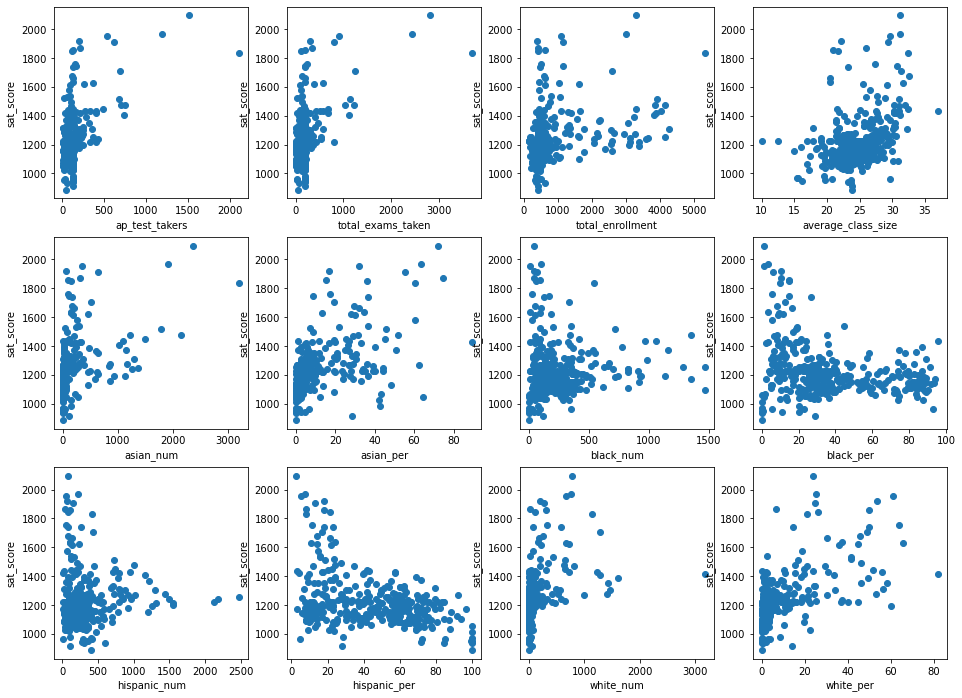

In [29]:
#Initiate matplotlib inline in Jupyter Notebook
%matplotlib inline
#Import matplotlib
import matplotlib.pyplot as plt

#Make several subplots
col =['ap_test_takers','total_exams_taken','total_enrollment','average_class_size','asian_num','asian_per','black_num','black_per','hispanic_num','hispanic_per','white_num','white_per']
fig=plt.figure(figsize=(16,12))
for i in range(12):
    axi = fig.add_subplot(3,4,i+1)
    axi.scatter(combined[col[i]],combined['sat_score'])
    axi.set_ylabel('sat_score')
    axi.set_xlabel(col[i])

With both table and graphs, unsurprisingly, ```'SAT Critical Reading Avg. Score'```, ```'SAT Math Avg. Score'```, and ```'SAT Writing Avg. Score'``` are strongly correlated with ```'sat_score'```.

We can also make some other observations:

- The percentage and number of females correlate positively with SAT scores, whereas those of males - negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety and respect (```'saf_t_11'``` and ```'saf_s_11'```) correlate with SAT scores.
- Student ratings of school academic standards (```'aca_s_11'```) correlate with SAT scores, but this doesn't hold for ratings from teachers and parents.
- There is significant racial inequality in SAT scores.
- The percentage of English language learners at the school (```'ell_percent'```) has a strong negative correlation with SAT scores.

## Plotting Survey Correlations

Let's now visualize how the survey columns of our combined dataset correlate with SAT scores. Before, we've created a list of those columns called 'survey_fields'

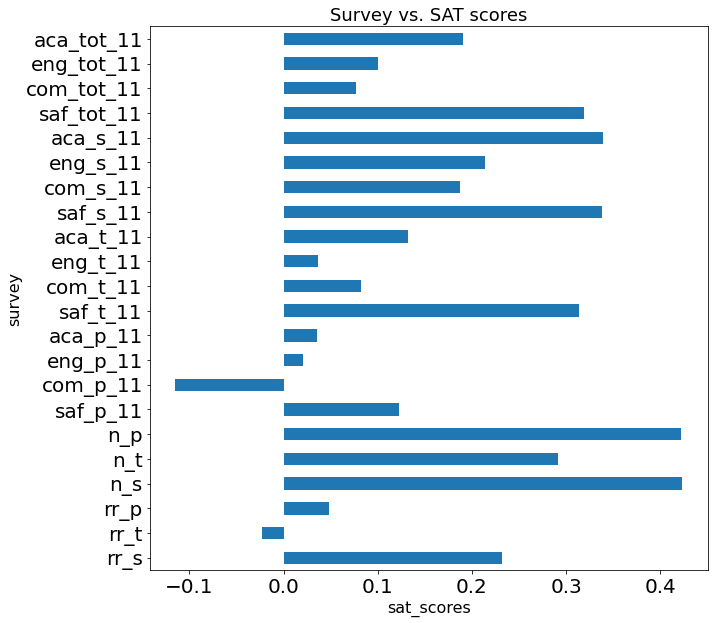

In [30]:
#Recreate the 'survey_fiels'
survey_fields = [ 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "n_s", 
    "n_t", 
    "n_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11"]

#Correlation coeficient barh plot
combined.corr()['sat_score'][survey_fields].plot.barh(figsize=(10, 10), fontsize=20)
plt.xlabel('sat_scores',size=23)
plt.title('Survey vs. SAT scores', fontsize=18)
plt.xlabel('sat_scores', size=16)
plt.ylabel('survey', size=16)
plt.show()

From this plot, we can confirm once again some of our observations above:

- Numbers of students, parents, and teachers (```'N_s'```, ```'N_p'```, ```'N_t'```) have a strong positive correlation with SAT scores.
- Teacher and student ratings of school safety and respect correlate with SAT scores, which looks reasonable.
- Student academic expectations scores correlate with SAT scores, but this doesn't hold for those from teachers and parents.

In addition, this plot allows us to discern some new patterns:

- Only 2 survey fields show a negative correlation with SAT scores. It looks logical: things like safety, respect, communication, academic standards, and engagement are indeed positive, and are supposed to be beneficial for learning outcomes.
- Scores from parents mostly show poor correlation with SAT scores, up to even be negative in case of communication score. This can probably mean their lack of involvement in those questions and/or misunderstanding of some concepts (for example, considering communication as a distracting factor for learning process).
- The student response rate shows rather strong positive correlation with SAT scores. It seems that students who demonstrate high learning results tend also to be more active socially (participating in such surveys). 

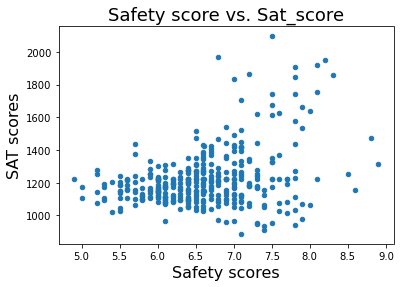

In [31]:
combined.plot.scatter(x='saf_s_11',y='sat_score')
plt.title('Safety score vs. Sat_score', fontsize=18)
plt.xlabel('Safety scores', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

## Analyse District Factor

Let's see if the safety rating is related to the ```'sat_score'```.

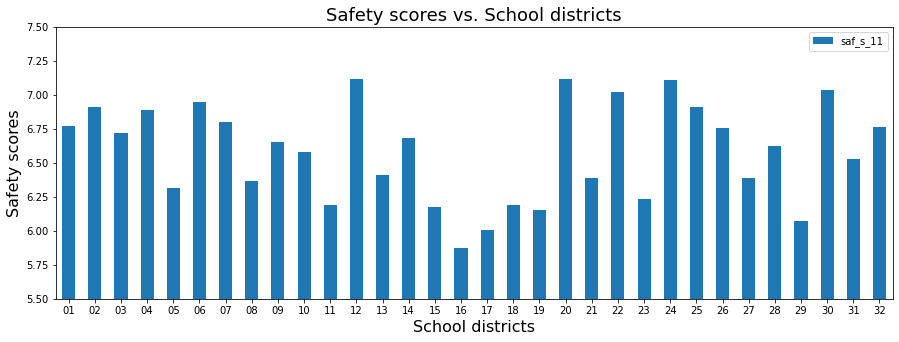

In [32]:
#Make a bar plot drawing the saf_s_11 base on school_dist
safe_dist=combined.pivot_table(index='school_dist',values='saf_s_11')
safe_dist.plot.bar(figsize=(15,5),rot=0)
plt.ylim(5.5,7.5)
plt.title('Safety scores vs. School districts', fontsize=18)
plt.xlabel('School districts', size=16)
plt.ylabel('Safety scores', size=16)
plt.show()

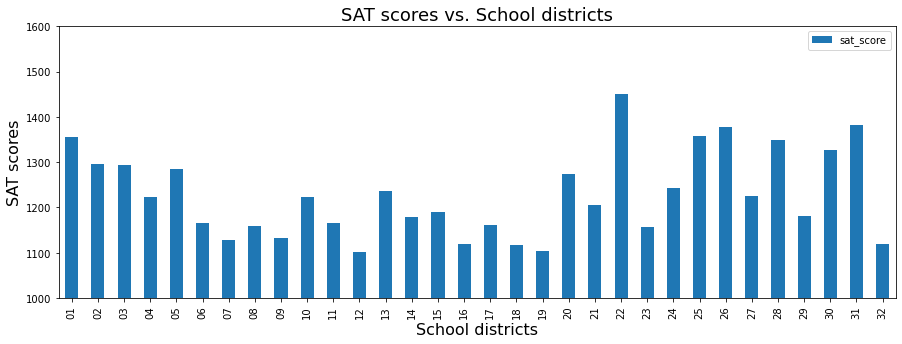

In [33]:
#Make a barplot showing school_dist and sat_score
dis_sat = combined.pivot_table(index='school_dist',values='sat_score')
dis_sat.plot.bar(figsize=(15,5))
plt.ylim(1000,1600)
plt.title('SAT scores vs. School districts', fontsize=18)
plt.xlabel('School districts', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

Interesting to see that school district from 20 to 32 showed a higher saftety rating and this also reflect of the higher sat_score average compare with other district.

## Analyse Race Bias

Now let's take a look about race

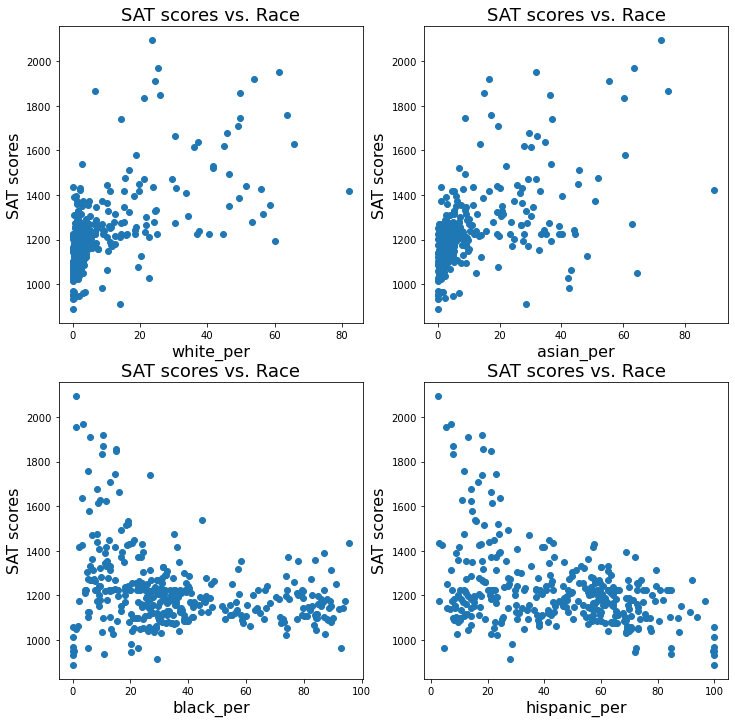

In [34]:
race=['white_per','asian_per','black_per','hispanic_per']

fig=plt.figure(figsize =(12,12))
               
for i in range(4):
    axi=fig.add_subplot(2,2,i+1)
    axi.scatter(combined[race[i]],combined['sat_score'])
    axi.set_xlabel(race[i], size =16)
    axi.set_ylabel('SAT scores',size=16)
    axi.set_title('SAT scores vs. Race', fontsize=18)

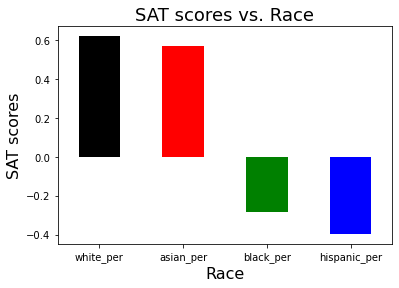

In [35]:
cols= ["white_per","asian_per","black_per","hispanic_per"]
combined.corr()['sat_score'][cols].plot.bar(rot=0,x="Race",color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('SAT scores vs. Race', fontsize=18)
plt.xlabel('Race', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

Interesting to see that the ```'sat_score'``` is positively correlated with the percentage of white and asian students and negatively correlated with black and hispanic students. This may be a consequence of race bias.

Let's dive in to see the result of school with higher hispanic percentage but lower ```'sat_score'```

<AxesSubplot:xlabel='hispanic_per', ylabel='sat_score'>

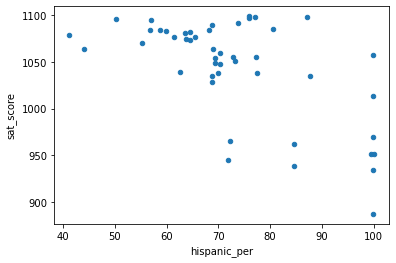

In [36]:
low_sat = combined[(combined['sat_score']<=1100)&(combined['hispanic_per']>40)]
low_sat.plot.scatter('hispanic_per','sat_score')

In [37]:
#Research any schools with a hispanic_per greater than 95%
schools_his95 = combined[combined["hispanic_per"]>95]["school_name"]
print(schools_his95)

                                           school_name  \
44                       MANHATTAN BRIDGES HIGH SCHOOL   
82    WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL   
89   GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...   
125                ACADEMY FOR LANGUAGE AND TECHNOLOGY   
141              INTERNATIONAL SCHOOL FOR LIBERAL ARTS   
176   PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE   
253                          MULTICULTURAL HIGH SCHOOL   
286             PAN AMERICAN INTERNATIONAL HIGH SCHOOL   

                               school_name  \
44           MANHATTAN BRIDGES HIGH SCHOOL   
82                                       0   
89   GREGORIO LUPERON HIGH SCHOOL FOR SCIE   
125                                      0   
141  INTERNATIONAL SCHOOL FOR LIBERAL ARTS   
176                                      0   
253              MULTICULTURAL HIGH SCHOOL   
286  PAN AMERICAN INTERNATIONAL HIGH SCHOO   

                                           school_name  
44   

The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores.

Let's check the school with low percentage of hispanic students but high ```'sat_score'```

In [38]:
#Research any schools with a hispanic_per less than 10%  and an average SAT score greater than 1800
schools_his10 = combined[(combined["hispanic_per"]<10) & (combined["sat_score"]>1800)]["school_name"]
print(schools_his10)

                                           school_name  \
37                              STUYVESANT HIGH SCHOOL   
151                       BRONX HIGH SCHOOL OF SCIENCE   
187                     BROOKLYN TECHNICAL HIGH SCHOOL   
327  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...   
356                STATEN ISLAND TECHNICAL HIGH SCHOOL   

                               school_name  \
37                  STUYVESANT HIGH SCHOOL   
151           BRONX HIGH SCHOOL OF SCIENCE   
187         BROOKLYN TECHNICAL HIGH SCHOOL   
327  QUEENS HIGH SCHOOL FOR THE SCIENCES A   
356    STATEN ISLAND TECHNICAL HIGH SCHOOL   

                                           school_name  
37                              Stuyvesant High School  
151                       Bronx High School of Science  
187                     Brooklyn Technical High School  
327  Queens High School for the Sciences at York Co...  
356                Staten Island Technical High School  


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

## Gender Analsysis 

Let's see the correlation between male and female students with ```'sat_score'```

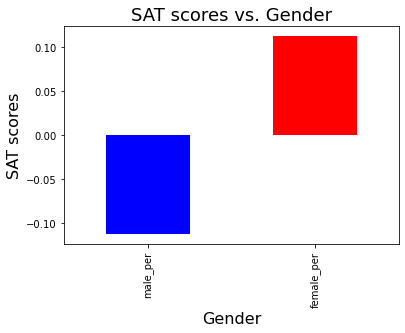

In [39]:
combined.corr()['sat_score'][['male_per','female_per']].plot.bar(color=['blue','red'])
plt.title('SAT scores vs. Gender', fontsize=18)
plt.xlabel('Gender', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

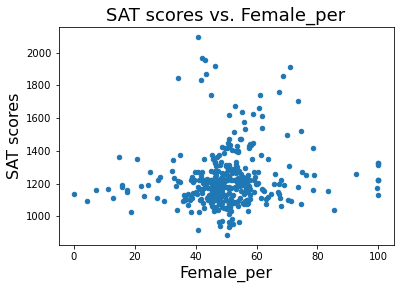

In [40]:
combined.plot.scatter('female_per','sat_score')
plt.title('SAT scores vs. Female_per', fontsize=18)
plt.xlabel('Female_per', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

Let's have a look of the schools with high female percentage and high ```'sat_score'```

In [41]:
#Research any schools with a female_per greater than 60% and an average SAT score greater than 1700.
school_his10 = combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["school_name"]
print(school_his10)

                                           school_name  \
5                       BARD HIGH SCHOOL EARLY COLLEGE   
26                       ELEANOR ROOSEVELT HIGH SCHOOL   
60                                  BEACON HIGH SCHOOL   
61   FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...   
302                        TOWNSEND HARRIS HIGH SCHOOL   

                              school_name  \
5          BARD HIGH SCHOOL EARLY COLLEGE   
26          ELEANOR ROOSEVELT HIGH SCHOOL   
60                     BEACON HIGH SCHOOL   
61   FIORELLO H. LAGUARDIA HIGH SCHOOL OF   
302           TOWNSEND HARRIS HIGH SCHOOL   

                                           school_name  
5                       Bard High School Early College  
26                       Eleanor Roosevelt High School  
60                                  Beacon High School  
61   Fiorello H. LaGuardia High School of Music & A...  
302                        Townsend Harris High School  


These schools appears to be very selective liberal arts schools that have high academic standards.

## Exploring AP Scores vs. SAT Scores
In the U.S., high school students can take Advanced Placement (AP) exam in a particular subject to earn college credit in that subject.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because ```'total_enrollment'``` is highly correlated with ```'sat_score'```, we don't want to bias our results. Instead, we'll look at the percentage of students in each school who took at least one AP exam.

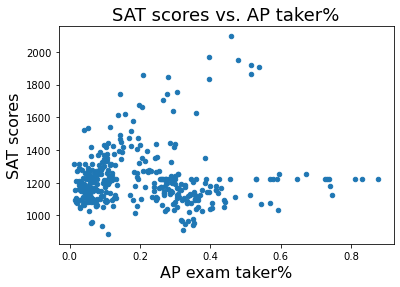

In [42]:
combined['ap_per'] = combined['ap_test_takers']/combined['total_enrollment']

combined.plot.scatter('ap_per','sat_score')
plt.title('SAT scores vs. AP taker%', fontsize=18)
plt.xlabel('AP exam taker%', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

On this plot, we can distinguish two clusters:

- The first one (a big cluster on the left side of the plot) demonstrates a strong positive correlation.
- The second big cluster doesn't show any correlation at all, even though here we can see rather high percentages of AP test takers up to more than 95%.

However, there seems to be an issue with the second cluster: many of the values of AP test takers percentage, especially those high, correspond to almost the same value of SAT score, which looks a kind of an average value. One possible explanation here is that this is a consequence of filling missing values, which we did at the beginning of the project after combining datasets. To check this assumption, let's re-run those steps for a test dataset (combined_test) without filling missing values and then re-create the plot above.

## Exploring Class Size and SAT Scores
Let's now expore the relationship between average class sizes and SAT scores. Presumably, the smaller the class is, the more attention is given to each student, so the average SAT score should be higher.

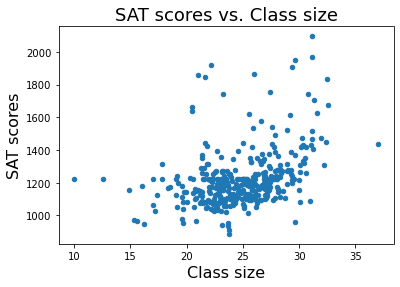

In [43]:
combined.plot.scatter('average_class_size','sat_score')
plt.title('SAT scores vs. Class size', fontsize=18)
plt.xlabel('Class size', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

Surprisingly, we observe a strong positive correlation here. There is also a cluster of schools with very high SAT scores, but even among them we clearly see the same trend.

## Exploring Free and Reduced Lunch and SAT Scores
To finish with the correlations of SAT scores with the other demographic factors, let's investigate their relationship with ```'frl_percent'``` - free and reduced lunch percentage. It can seem not so straightforward, but this factor serves as an indicator of the income level of a student's family, since free or reduced lunches are, most probably, offered only to the students from low-income families. Earlier we noted that this factor showed a possibility of a strong negative correlation with SAT scores. Let's see it it's confirmed by a scatter plot.

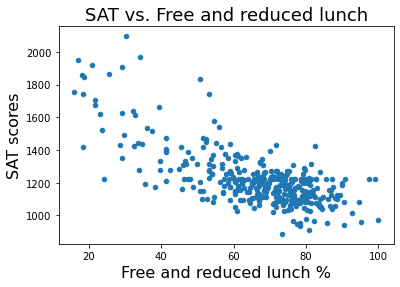

In [44]:
# Plotting 'sat_score' vs. 'frl_percent'
combined.plot.scatter(x='frl_percent', 
                      y='sat_score')
plt.title('SAT vs. Free and reduced lunch', fontsize=18)
plt.xlabel('Free and reduced lunch %', size=16)
plt.ylabel('SAT scores', size=16)
plt.show()

We observe an evident strong negative correlation. It means that the students from subsidized categories (i.e., from poor and low-income families) do worse on the SAT than the students from relatively wealthy families.

## Conclusion
In this project, we cleaned, combined, visualized and analyzed data from different datasets, containing information about SAT scores and demographics in NYC public high schools. In particular, we explored relationships between SAT scores and various demographic factors, in order to detect possible biases in the SAT. Additionally, we explored survey responses from parents, teachers and students of the schools, on how they estimated other factors, possibly influencing learning results. Below are the main findings of our research.

- Positive correlations with SAT scores: safety and respect scores from teachers and students, total enrollment, female percentage, White and Asian race percentages, AP test takers percentage, class size.
- Negative correlations with SAT scores: english learner percentage, male percentage, Black and Hispanic race percentages, free and reduced lunch percentage (as an indicator of a student's family income).
- The district with the highest SAT score is characterized also by the highest safety and respect score.
- Parents tend to give the highest scores in the survey, while students - the lowest.